In [15]:
import gym
import numpy as np

In [19]:
env = gym.make(
    "reference_environment:rangl-nztc-v0"
)
env.param.noise_observability = False
env.seed(1)
env.reset()

(-1,)

In [20]:
import joblib

policy = joblib.load("optimal_policy.pkl")

In [31]:
import gym
import numpy as np

class Evaluate:
    def __init__(self, env):
        self.env = env

    def random_agent(self, seeds):
        rewards = []
        for seed in seeds:
            self.env.seed(seed)
            self.env.reset()
            while not self.env.state.is_done():
                ###
                action = self.env.action_space.sample()/20
                ###
                self.env.step(action)
            rewards.append(sum(self.env.state.rewards_all))
        return np.mean(rewards)


    def constant_agent(self, const, seeds=[0]):
        rewards = []
        for seed in seeds:
            self.env.seed(seed)
            self.env.reset()
            while not self.env.state.is_done():
                ###
                action = const*np.ones(3)
                ###
                state, reward, done, _ = self.env.step(action)
                #print(state, reward, done)
            rewards.append(sum(self.env.state.rewards_all))
        return np.mean(rewards)
    

    def scripted_agent(self, policy, seeds=[0]):
        rewards = []
        for seed in seeds:
            self.env.seed(seed)
            self.env.reset()
            count = 0
            while not self.env.state.is_done():
                action = policy[count]
                state, reward, done, _ = self.env.step(action)
                print(state, reward, policy[count])
                count+=1
            rewards.append(sum(self.env.state.rewards_all))
        return np.mean(rewards)

    def scripted_agent_diagnostic(self, policy, seeds=[0]):
        rewards = []
        for seed in seeds:
            self.env.seed(seed)
            self.env.reset()
            count = 0
            while not self.env.state.is_done():
                action = policy[count]
                state, reward, done, _ = self.env.step(action)
                #print(state, reward, policy[count])
                count+=1
                rewards.append(reward)
        return rewards
    
    
evaluate = Evaluate(env)
const = 1
n_in = 21
n = 1
seeds = np.arange(n_in,n_in+n)
mean_reward_rand = evaluate.random_agent(seeds=seeds)
mean_reward_const = evaluate.constant_agent(const=const, seeds = seeds)
mean_reward_scripted = evaluate.scripted_agent(policy=policy, seeds = seeds)

print("mean reward of random "+str(mean_reward_rand/10000))
print('mean reward of constant {} agent '.format(const) +str(mean_reward_const/10000))
print('mean reward of scripted agent ' +str(mean_reward_scripted/10000))

(0,) -15942.97607421875 [34.06098921 35.10157699  1.96883022]
(1,) -74009.26416015625 [ 8.15768141 27.74061357  3.78296749]
(2,) -47145.09912109375 [ 3.54308994 39.95603924  0.08742552]
(3,) 932953.3344726562 [93.4220143  68.83593414 18.86210422]
(4,) -437951.2158203125 [9.11018146e+01 5.39128897e+01 9.37666513e-03]
(5,) -865474.009765625 [10.25363548 89.16170143  5.60669984]
(6,) 298500.66015625 [17.68934498 13.02025925 20.05841931]
(7,) -662854.0346069336 [23.12969423 94.50491924  2.44392807]
(8,) -47941.894287109375 [38.04449519 16.62203998  0.06062715]
(9,) 39929.82019042969 [18.87386982 32.57907884  0.27147199]
(10,) 250640.01751708984 [ 9.20220743 76.40191643  6.75912408]
(11,) 170691.39111328125 [71.59111116  2.75981099  9.98611507]
(12,) -357287.2532043457 [ 8.66206711 21.22874917  0.10343962]
(13,) 875176.7425231934 [27.99018467 14.08841979 20.53984744]
(14,) 311676.0107421875 [39.00127893 29.48090945 23.78639934]
(15,) -713246.98046875 [53.4416578   0.11025784 10.03698162]
(1

In [38]:
seeds

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

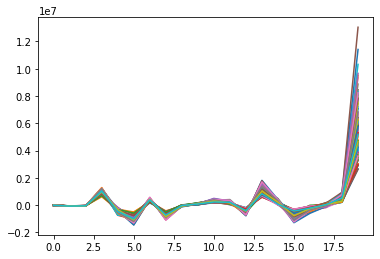

In [41]:
import matplotlib.pyplot as plt
n_in = 21
n = 100
seeds = np.arange(n_in,n_in+n)
for seed in seeds:
    plt.plot(evaluate.scripted_agent_diagnostic(policy=policy, seeds = [seed]))

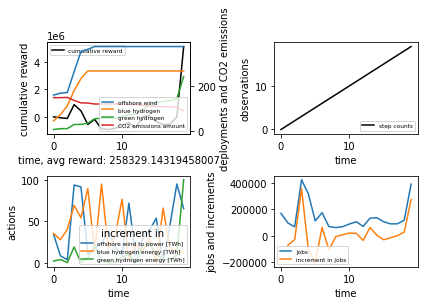

In [42]:
env.plot()

In [2]:
client = docker.from_env()

In [ ]:
submission = client.containers.run(
        image="netzerotc-project_nztc",
        name="agent",
        network="evalai_rangl",
        detach=False,
        auto_remove=True,
        # command="sleep infinity",  # debug
        environment={
            "RANGL_SEED": 1,
            "RANGL_ENVIRONMENT_URL": "http://nztc:5000",
        },
    )

In [9]:
import docker
client = docker.from_env()
print(client)

In [ ]:
COPY . /service
WORKDIR /service